In [ ]:
import os
import numpy as np
import pandas as pd
import warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

df = pd.read_csv('https://raw.githubusercontent.com/Neha-Chiluka/deeplearning/refs/heads/main/tensorflow/data/winequalityN.csv')
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3065,white,7.0,0.150,0.38,15.30,0.045,54.0,120.0,0.99750,3.18,0.42,9.8,6
3262,white,7.6,0.190,0.32,18.75,0.047,32.0,193.0,1.00014,3.10,0.50,9.3,7
5856,red,6.4,0.570,0.12,2.30,0.120,25.0,36.0,0.99519,3.47,0.71,11.3,7
957,white,6.6,0.230,0.32,0.90,0.041,25.0,79.0,0.99260,3.39,0.54,10.2,7
1252,white,5.6,0.245,0.32,1.10,0.047,24.0,152.0,0.99270,3.12,0.42,9.3,6


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare the data
df = df.dropna()
df['is_white_wine'] = [1 if typ == 'white' else 0 for typ in df['type']]
df['is_good_wine'] = [1 if quality >= 6 else 0 for quality in df['quality']]
df.drop(['type', 'quality'], axis=1, inplace=True)

# Train/test split
X = df.drop('is_good_wine', axis=1)
y = df['is_good_wine']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from datetime import datetime
tf.random.set_seed(42)

def build_and_train(callbacks: list, num_epochs: int = 5) -> tf.keras.Sequential:
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        loss=tf.keras.losses.binary_crossentropy,
        optimizer=tf.keras.optimizers.Adam(),
        metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
    )

    model.fit(
        X_train_scaled,
        y_train,
        epochs=num_epochs,
        validation_data=(X_test_scaled, y_test),
        callbacks=callbacks,
        verbose=0
    )

    return model

In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.time_started = None
        self.time_finished = None

    def on_train_begin(self, logs=None):
        self.time_started = datetime.now()
        print(f'TRAINING STARTED | {self.time_started}\n')

    def on_train_end(self, logs=None):
        self.time_finished = datetime.now()
        train_duration = str(self.time_finished - self.time_started)
        print(f'\nTRAINING FINISHED | {self.time_finished} | Duration: {train_duration}')

        tl = f"Training loss:       {logs['loss']:.5f}"
        ta = f"Training accuracy:   {logs['accuracy']:.5f}"
        vl = f"Validation loss:     {logs['val_loss']:.5f}"
        va = f"Validation accuracy: {logs['val_accuracy']:.5f}"

        print('\n'.join([tl, vl, ta, va]))

In [ ]:
model = build_and_train(
    callbacks=[MyCallback()]
)

TRAINING STARTED | 2024-11-19 08:02:37.012354


TRAINING FINISHED | 2024-11-19 08:02:41.261686 | Duration: 0:00:04.249332
Training loss:       0.46827
Validation loss:     0.47263
Training accuracy:   0.77776
Validation accuracy: 0.76875


In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.time_started = None
        self.time_finished = None
        self.time_curr_epoch = None

    def on_train_begin(self, logs=None):
        self.time_started = datetime.now()
        print(f'TRAINING STARTED | {self.time_started}\n')

    def on_train_end(self, logs=None):
        self.time_finished = datetime.now()
        train_duration = str(self.time_finished - self.time_started)
        print(f'\nTRAINING FINISHED | {self.time_finished} | Duration: {train_duration}')

        tl = f"Training loss:       {logs['loss']:.5f}"
        ta = f"Training accuracy:   {logs['accuracy']:.5f}"
        vl = f"Validation loss:     {logs['val_loss']:.5f}"
        va = f"Validation accuracy: {logs['val_accuracy']:.5f}"

        print('\n'.join([tl, vl, ta, va]))

    def on_epoch_begin(self, epoch, logs=None):
        self.time_curr_epoch = datetime.now()

    def on_epoch_end(self, epoch, logs=None):
        epoch_dur = (datetime.now() - self.time_curr_epoch).total_seconds()
        tl = logs['loss']
        ta = logs['accuracy']
        vl = logs['val_loss']
        va = logs['val_accuracy']

        train_metrics = f"train_loss: {tl:.5f}, train_accuracy: {ta:.5f}"
        valid_metrics = f"valid_loss: {vl:.5f}, valid_accuracy: {va:.5f}"

        print(f"Epoch: {epoch:4} | Runtime: {epoch_dur:.3f}s | {train_metrics} | {valid_metrics}")

In [ ]:
model = build_and_train(
    callbacks=[MyCallback()]
)

TRAINING STARTED | 2024-11-19 07:38:31.297669

Epoch:    0 | Runtime: 1.782s | train_loss: 0.54087, train_accuracy: 0.71644 | valid_loss: 0.49214, valid_accuracy: 0.75406
Epoch:    1 | Runtime: 0.299s | train_loss: 0.49575, train_accuracy: 0.76267 | valid_loss: 0.48221, valid_accuracy: 0.76566
Epoch:    2 | Runtime: 0.320s | train_loss: 0.48412, train_accuracy: 0.77079 | valid_loss: 0.47839, valid_accuracy: 0.77262
Epoch:    3 | Runtime: 0.285s | train_loss: 0.47516, train_accuracy: 0.77331 | valid_loss: 0.47434, valid_accuracy: 0.77262
Epoch:    4 | Runtime: 0.555s | train_loss: 0.46826, train_accuracy: 0.77930 | valid_loss: 0.47084, valid_accuracy: 0.77649

TRAINING FINISHED | 2024-11-19 07:38:34.551995 | Duration: 0:00:03.254326
Training loss:       0.46826
Validation loss:     0.47084
Training accuracy:   0.77930
Validation accuracy: 0.77649


In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.time_started = None
        self.time_finished = None
        self.time_curr_epoch = None
        self.num_epochs = 0
        self._loss, self._acc, self._val_loss, self._val_acc = [], [], [], []

    def _plot_model_performance(self):
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.suptitle('Model performance', size=20)

        ax1.plot(range(self.num_epochs), self._loss, label='Training loss')
        ax1.plot(range(self.num_epochs), self._val_loss, label='Validation loss')
        ax1.set_xlabel('Epoch', size=14)
        ax1.set_ylabel('Loss', size=14)
        ax1.legend()

        ax2.plot(range(self.num_epochs), self._acc, label='Training accuracy')
        ax2.plot(range(self.num_epochs), self._val_acc, label='Validation Accuracy')
        ax2.set_xlabel('Epoch', size=14)
        ax2.set_ylabel('Accuracy', size=14)
        ax2.legend()

    def on_train_begin(self, logs=None):
        self.time_started = datetime.now()
        print(f'TRAINING STARTED | {self.time_started}\n')

    def on_train_end(self, logs=None):
        self.time_finished = datetime.now()
        train_duration = str(self.time_finished - self.time_started)
        print(f'\nTRAINING FINISHED | {self.time_finished} | Duration: {train_duration}')

        tl = f"Training loss:       {logs['loss']:.5f}"
        ta = f"Training accuracy:   {logs['accuracy']:.5f}"
        vl = f"Validation loss:     {logs['val_loss']:.5f}"
        va = f"Validation accuracy: {logs['val_accuracy']:.5f}"

        print('\n'.join([tl, vl, ta, va]))
        self._plot_model_performance()

    def on_epoch_begin(self, epoch, logs=None):
        self.time_curr_epoch = datetime.now()

    def on_epoch_end(self, epoch, logs=None):
        self.num_epochs += 1
        epoch_dur = (datetime.now() - self.time_curr_epoch).total_seconds()
        tl = logs['loss']
        ta = logs['accuracy']
        vl = logs['val_loss']
        va = logs['val_accuracy']

        self._loss.append(tl); self._acc.append(ta); self._val_loss.append(vl); self._val_acc.append(va)

        train_metrics = f"train_loss: {tl:.5f}, train_accuracy: {ta:.5f}"
        valid_metrics = f"valid_loss: {vl:.5f}, valid_accuracy: {va:.5f}"

        print(f"Epoch: {epoch:4} | Runtime: {epoch_dur:.3f}s | {train_metrics} | {valid_metrics}")

TRAINING STARTED | 2024-11-19 07:38:41.852471

Epoch:    0 | Runtime: 1.795s | train_loss: 0.55754, train_accuracy: 0.70542 | valid_loss: 0.49654, valid_accuracy: 0.75793
Epoch:    1 | Runtime: 0.463s | train_loss: 0.50123, train_accuracy: 0.75899 | valid_loss: 0.48214, valid_accuracy: 0.76102
Epoch:    2 | Runtime: 0.306s | train_loss: 0.48541, train_accuracy: 0.76789 | valid_loss: 0.47733, valid_accuracy: 0.76334
Epoch:    3 | Runtime: 0.322s | train_loss: 0.47493, train_accuracy: 0.77660 | valid_loss: 0.47528, valid_accuracy: 0.76721
Epoch:    4 | Runtime: 0.598s | train_loss: 0.46628, train_accuracy: 0.78259 | valid_loss: 0.47376, valid_accuracy: 0.76875
Epoch:    5 | Runtime: 0.313s | train_loss: 0.45853, train_accuracy: 0.78665 | valid_loss: 0.47337, valid_accuracy: 0.76953
Epoch:    6 | Runtime: 0.733s | train_loss: 0.45169, train_accuracy: 0.78859 | valid_loss: 0.47265, valid_accuracy: 0.77030
Epoch:    7 | Runtime: 0.647s | train_loss: 0.44502, train_accuracy: 0.79362 | valid_

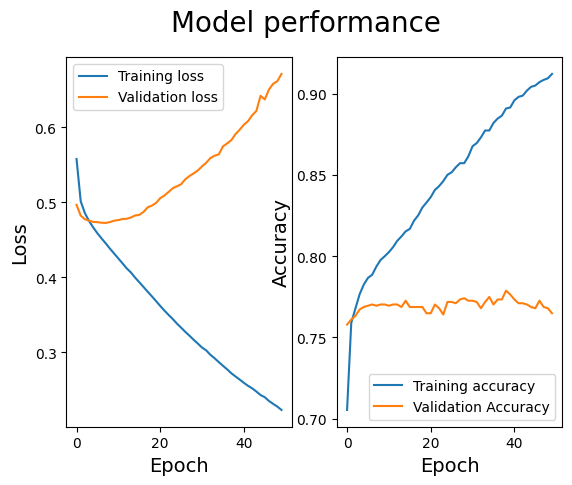

In [ ]:
!pip install matplotlib

import matplotlib.pyplot as plt
model = build_and_train(
    callbacks=[MyCallback()],
    num_epochs=50
)